In [1]:
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('fraud_oracle.csv')

In [3]:
# Data Cleaning
df = df.drop_duplicates() # remove duplicates
df = df.dropna() # remove rows with missing values


In [4]:
# Data Transformation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])
df['AccidentArea'] = le.fit_transform(df['AccidentArea'])
df['Sex'] = le.fit_transform(df['Sex'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Fault'] = le.fit_transform(df['Fault'])
df['PolicyType'] = le.fit_transform(df['PolicyType'])
df['VehicleCategory'] = le.fit_transform(df['VehicleCategory'])
df['PoliceReportFiled'] = le.fit_transform(df['PoliceReportFiled'])
df['WitnessPresent'] = le.fit_transform(df['WitnessPresent'])
df['AgentType'] = le.fit_transform(df['AgentType'])
df['AddressChange_Claim'] = le.fit_transform(df['AddressChange_Claim'])
df['BasePolicy'] = le.fit_transform(df['BasePolicy'])

In [7]:
# Declaring Function Convert to float 

import re

def convert_to_float(val):
    if isinstance(val, int):
        return float(val)
    elif isinstance(val, float):
        return val
    elif 'more than' in val:
        return float(re.findall(r'\d+', val)[0])
    elif 'to' in val:
        return sum(map(float, re.findall(r'\d+', val))) / 2
    elif 'years' in val:
        return float(re.findall(r'\d+', val)[0])
    else:
        return None


In [8]:
# Replace 'more than 30' with 31 in the 'Age' column
df['Days_Policy_Accident'] = df['Days_Policy_Accident'].apply(convert_to_float)
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].apply(convert_to_float)
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].apply(convert_to_float)
df['AgeOfVehicle'] = df['AgeOfVehicle'].apply(convert_to_float)
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].apply(convert_to_float)
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].apply(convert_to_float)
df['NumberOfCars'] = df['NumberOfCars'].apply(convert_to_float)
df['VehiclePrice'] = df['VehiclePrice'].apply(convert_to_float)
# Convert the 'Age' column to float
df['Days_Policy_Accident'] = df['Days_Policy_Accident'].astype(float)
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].astype(float)
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].astype(float)
df['AgeOfVehicle'] = df['AgeOfVehicle'].astype(float)
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].astype(float)
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].astype(float)
df['NumberOfCars'] = df['NumberOfCars'].astype(float)
df['VehiclePrice'] = df['VehiclePrice'].astype(float)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'NumberOfCars']] = scaler.fit_transform(df[['Age', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'NumberOfCars']])


<AxesSubplot:xlabel='FraudFound_P', ylabel='Count'>

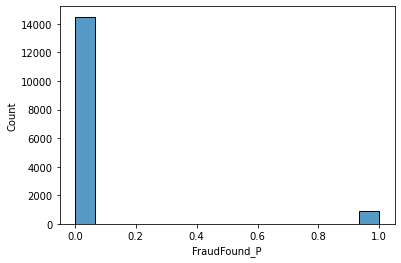

In [10]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['FraudFound_P'])

<AxesSubplot:>

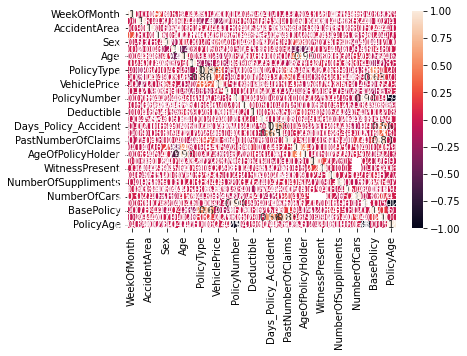

In [16]:
# creating a correlation matrix
corr = df.corr()

# visual representation of the correlation matrix
sns.heatmap(corr, annot=True)

In [45]:
# Feature Engineering
df['TotalNumberOfClaims'] = df['PastNumberOfClaims'] + df['Days_Policy_Accident']
df['PolicyAge'] = 2023 - df['Year']

df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,TotalNumberOfClaims,PolicyAge
0,Dec,5,Wednesday,6,1,Tuesday,Jan,1,0,2,...,0,0,0,NaN,0,-0.24628,1994,2,NaN,29
1,Jan,3,Wednesday,6,1,Monday,Jan,4,1,2,...,1,0,0,NaN,3,NaN,1994,1,NaN,29
2,Oct,5,Friday,6,1,Thursday,Nov,2,1,1,...,0,0,0,NaN,3,NaN,1994,1,NaN,29
3,Jun,2,Saturday,17,0,Friday,Jul,1,1,1,...,1,0,0,0.856003,3,NaN,1994,2,NaN,29
4,Jan,5,Monday,6,1,Tuesday,Feb,2,0,2,...,0,0,0,NaN,3,NaN,1994,1,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,17,1,Tuesday,Nov,5,1,1,...,0,0,0,NaN,3,NaN,1996,1,-0.525014,27
15416,Nov,5,Thursday,13,1,Friday,Dec,1,1,1,...,0,0,0,0.856003,3,-0.24628,1996,2,1.732265,27
15417,Nov,5,Thursday,17,0,Friday,Dec,1,1,2,...,0,0,0,-1.482217,3,NaN,1996,1,1.732265,27
15418,Dec,1,Monday,17,1,Thursday,Dec,2,0,1,...,0,0,0,0.856003,3,NaN,1996,0,NaN,27


In [18]:
# Model Building
from sklearn.model_selection import train_test_split
X = df.drop(['FraudFound_P', 'PolicyNumber','Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed'], axis=1)
y = df['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.impute import SimpleImputer

# Fill in missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)

In [40]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print('Accuracy:', accuracy*100)
print('Precision:',precision*100)
print('Recall Score:',recall_score(y_test, y_pred)*100)
print('F1 Score:',f1_score(y_test, y_pred)*100)
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))


Accuracy: 93.61219195849546
Precision: 100.0
Recall Score: 0.0
F1 Score: 0.0
Confusion Matrix: [[2887    0]
 [ 197    0]]
